# Proyek Pertama (Predictive Analytics):
- **Nama:** Ch Angga Marceclio
- **Email:** chmarcel0603@gmail.com
- **ID Dicoding:** MC315D5Y1131

## Deskripsi Proyek

Proyek ini bertujuan mengembangkan sistem untuk membantu petani memilih jenis tanaman paling sesuai berdasarkan kondisi tanah dan lingkungan. Sistem ini akan menggunakan algoritma Machine Learning (seperti Random Forest, Decision Tree, dan K-Nearest Neighbors) untuk menganalisis parameter agrikultur, seperti pH tanah, kadar nutrisi, suhu, dan curah hujan. Tujuannya adalah meningkatkan akurasi pemilihan tanaman, mengoptimalkan hasil panen, dan mengurangi risiko kegagalan, sehingga mendukung pertanian presisi yang lebih efisien dan berkelanjutan.

## **1. Import Library**

In [1]:
# Standard Libraries
import re
import string
from io import StringIO
import csv
import pickle
import joblib
import requests

# Utilities
from tqdm import tqdm
from google.colab import drive

# Data Processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout,
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

## **2. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

### 2.1 Data Loading

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Baca dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/crop_recommendation.csv")
df

Mounted at /content/drive


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Proses ini melibatkan pemuatan dataset crop_recommendation.csv yang berisi 2200 baris dan 8 kolom. Kolom-kolom tersebut mencakup fitur numerik seperti kadar Nitrogen, Fosfor, Kalium, suhu, kelembapan, pH tanah, curah hujan, serta kolom target label yang berisi jenis tanaman. Tahap ini juga melibatkan proses mengimpor atau membaca data dari sumber eksternal ke dalam lingkungan kerja (dalam kasus ini, Google Colab)

### 2.2 Exploratory Data Analysis

Exploratory Data Analysis (EDA) merupakan proses awal analisis data untuk memahami karakteristik, struktur, pola, dan potensi anomali dalam dataset. Tujuannya adalah mendapatkan wawasan mendalam tentang data melalui statistik deskriptif dan visualisasi (misalnya, histogram, box plot, scatter plot) sebelum membangun model Machine Learning. EDA membantu mengidentifikasi hubungan antar variabel, mendeteksi outlier, dan memastikan kualitas data, yang semuanya krusial untuk keputusan pemodelan yang tepat.

In [3]:
# Menampilkan lima data teratas.
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Menampilkan statistik deskriptif untuk setiap kolom numerik dalam dataset. Ini mencakup informasi seperti:

- count: Jumlah entri non-null (2200 untuk semua kolom, menunjukkan tidak ada missing value).
- mean: Rata-rata nilai.
- std: Standar deviasi, mengukur sebaran data.
- min: Nilai minimum.
- 25%, 50%, 75%: Kuartil pertama, median (kuartil kedua), dan kuartil ketiga, yang menunjukkan distribusi data.
max: Nilai maksimum.

Statistik ini memberikan gambaran ringkas tentang distribusi dan rentang nilai dari setiap fitur agrikultur (N, P, K, temperature, humidity, pH, rainfall) dalam dataset.

In [5]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


Dataset ini memiliki distribusi kelas yang seimbang (balanced dataset). Setiap jenis tanaman (label) memiliki 100 sampel, sehingga total ada 22 jenis tanaman dengan 2200 sampel keseluruhan. Ini menunjukkan bahwa tidak ada bias terhadap jenis tanaman tertentu dalam dataset, yang merupakan kondisi ideal untuk pelatihan model klasifikasi.

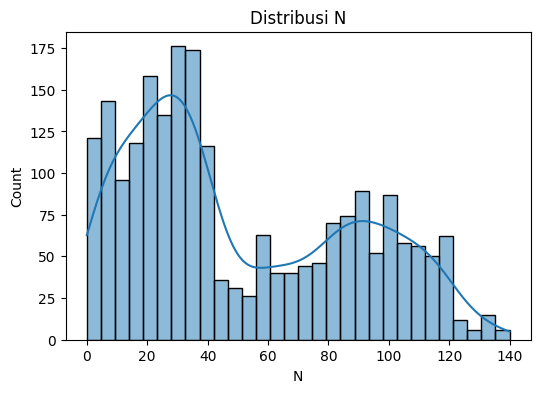

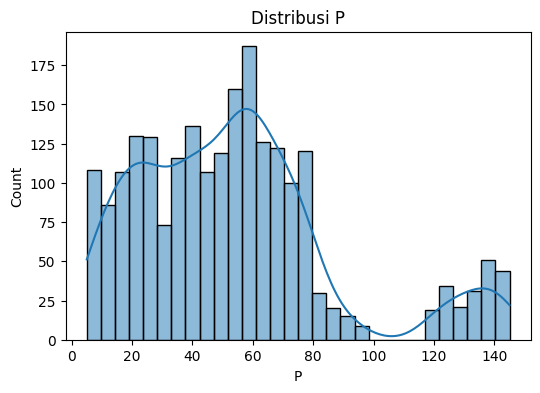

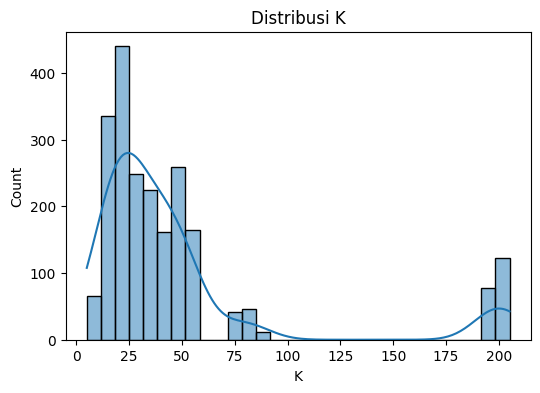

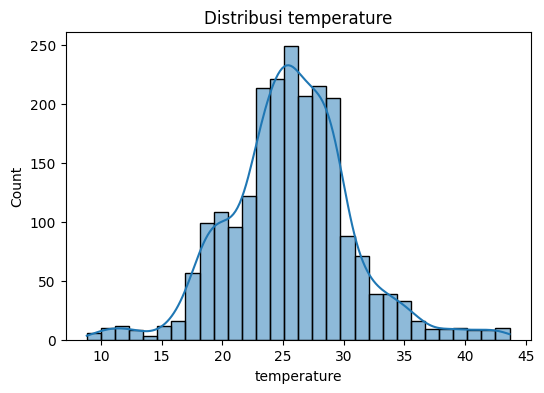

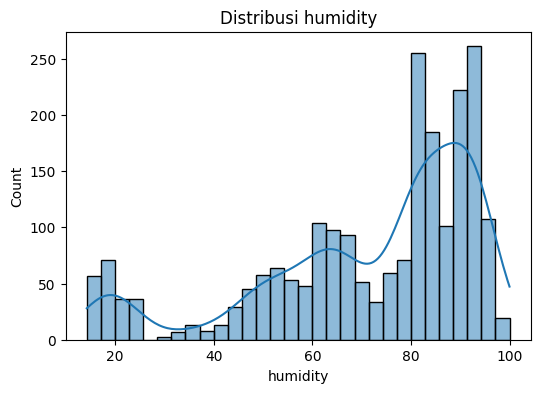

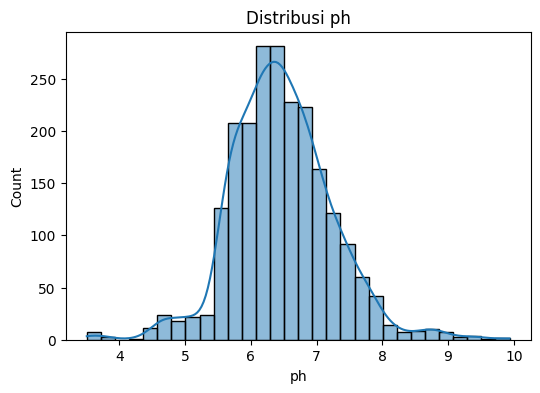

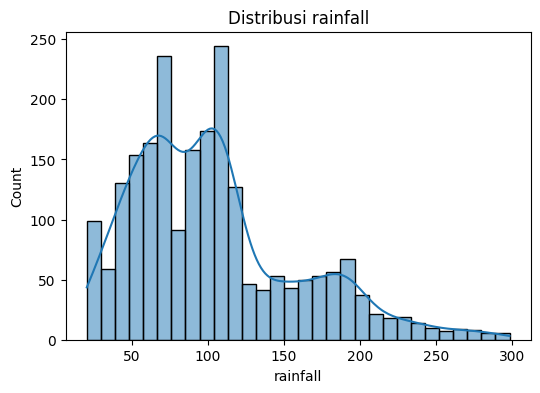

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()


Pada bagian diatas digunakan untuk memvisualisasikan distribusi setiap fitur numerik (N, P, K, temperature, humidity, ph, rainfall) dalam dataset. Setiap histogram menampilkan frekuensi atau densitas nilai-nilai fitur, membantu mengidentifikasi pola seperti bentuk distribusi (normal, miring), rentang nilai, dan keberadaan outlier. Ini adalah bagian penting dari Eksplorasi Data (EDA) untuk memahami karakteristik individual dari setiap variabel.

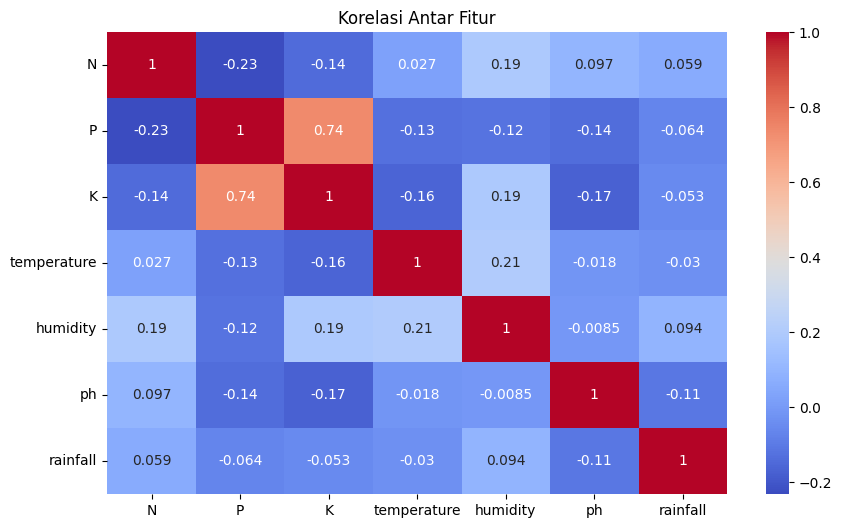

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

Gambar diatas adalah heatmap korelasi antar fitur, yang memvisualisasikan kekuatan dan arah hubungan linear antara setiap pasang variabel numerik dalam dataset, membantu mengidentifikasi fitur yang saling bergantung.

### 2.3 Exploratory Data Analysis - Menangani Missing Value dan Redudency Data

In [9]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Tidak ada nilai yang hilang (missing values) dalam dataset, artinya data lengkap dan bersih.

In [10]:
print(df.duplicated().sum())

0


Tidak ada baris duplikat dalam dataset, menunjukkan data unik dan tidak ada entri ganda.

## **3. Data Preparation**



Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

In [11]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

Melakukan pemisahan fitur dan target dari dataset. features menyimpan kolom-kolom input (N, P, K, suhu, kelembapan, pH, curah hujan) yang akan digunakan untuk membuat prediksi, sementara target menyimpan kolom label (jenis tanaman) yang merupakan variabel yang ingin diprediksi.

In [12]:
# Menginisialisasi daftar kosong untuk menambahkan semua nama model dan nama yang sesuai
acc = []
model = []

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

Melakukan pembagian data menjadi set pelatihan (x_train, y_train) dan set pengujian (x_test, y_test) menggunakan train_test_split dari scikit-learn. Sebanyak 20% data (test_size=0.2) dialokasikan untuk pengujian, sementara sisanya untuk pelatihan model, dengan random_state=2 untuk memastikan reproduktifitas pembagian.

## **4. Modeling**

Modeling adalah tahapan di mana algoritma Machine Learning dipilih dan dilatih menggunakan data pelatihan untuk mempelajari pola. Setelah pelatihan, model dievaluasi menggunakan data pengujian untuk mengukur kinerjanya dalam membuat prediksi baru.

### 4.1 Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [15]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


### 4.2 Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values, zero_division=0))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [17]:
# Cross validation score (Logistic Regression)
score = cross_val_score(DT,features,target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### 4.3 KNN (K-Nearest Neighbor)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [19]:
# Cross validation score (Logistic Regression)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

## **5. Evaluasi Model**

### 5.1 Skor Model

In [31]:
results = pd.DataFrame({'Model': model, 'Accuracy': acc})
print("--- Perbandingan Hasil Akurasi Model ---")
print(results.sort_values(by='Accuracy', ascending=False).to_markdown(index=False))

--- Perbandingan Hasil Akurasi Model ---
| Model                |   Accuracy |
|:---------------------|-----------:|
| RF                   |   0.990909 |
| K Nearest Neighbours |   0.975    |
| Decision Tree        |   0.9      |


### 5.2 Visualisasi Perbandingan Skor Model

<ipython-input-20-0848ec2ad029>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc, y=model, palette='viridis')


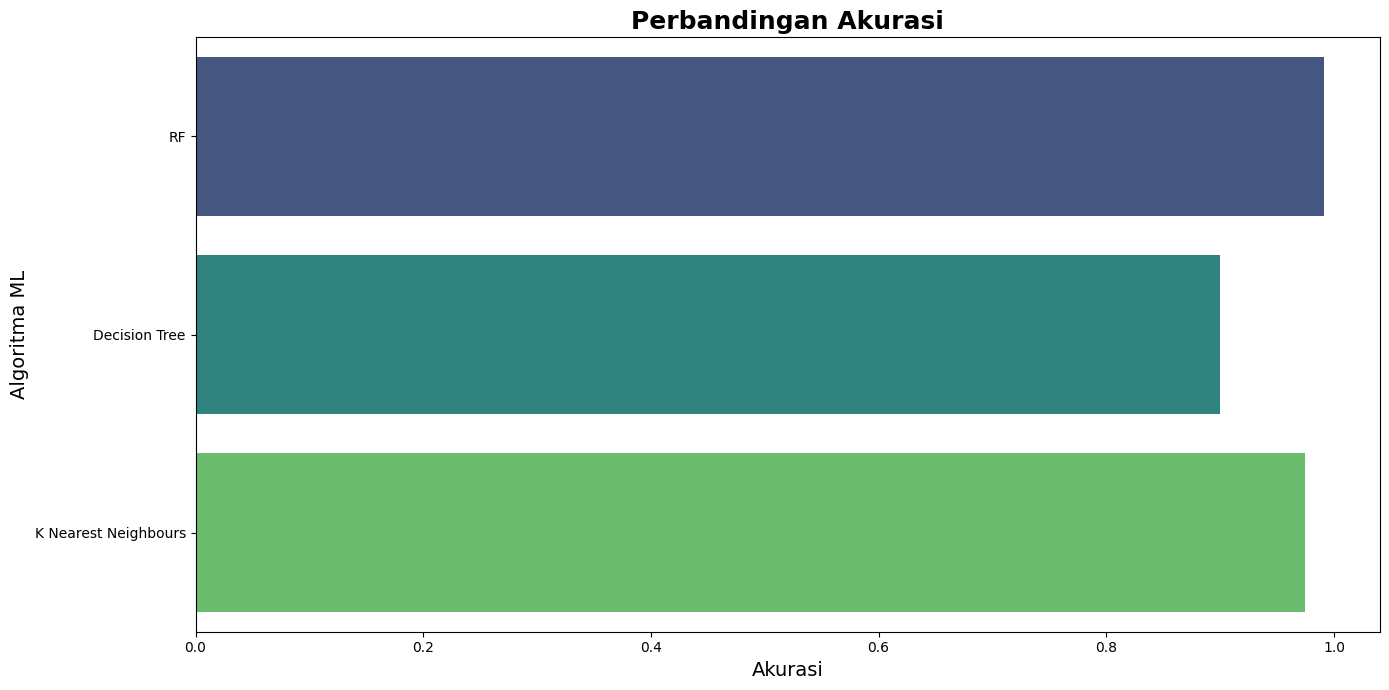

In [20]:
plt.figure(figsize=(14, 7), dpi=100, facecolor='white')
plt.title('Perbandingan Akurasi', fontsize=18, fontweight='bold')
plt.xlabel('Akurasi', fontsize=14)
plt.ylabel('Algoritma ML', fontsize=14)
sns.barplot(x=acc, y=model, palette='viridis')

# Menyimpan plot
plt.tight_layout()
plt.savefig('perbandingan_akurasi.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Proses diatas melibatkan pengujian model yang sudah dilatih dengan data baru yang spesifik (misalnya, data kondisi tanah dan iklim tertentu) untuk mendapatkan rekomendasi tanaman dari model tersebut. Sebuah set data input baru (data) disiapkan, kemudian model RF (Random Forest) yang telah dilatih digunakan untuk memprediksi jenis tanaman berdasarkan data tersebut, dan hasilnya dicetak.